# 순환신경망 (RNN - Recurrent Neural Network)
- Sequential Data(순차데이터) 특성 추출에 좋은 성능을 내는 Recurrent Layer를 사용하는 딥러닝 모델.

# Sequential data란

- 데이터의 **순서 정보가 중요한 데이터셋으로** 순서가 달라질 경우 의미가 바뀌거나 손상되는 데이터를 말한다.
- 예
    - 자연어 텍스트
    - 일정한 주기로 샘플링된 영상, 음성
    - 시계열(time series) 데이터
- Time series
    - Sequen tial 의이터중 데이터는 순서에 더해 해당 **데이터가 발생한 시점 정보가 중요한 데이터셋을** 말한다.

##  RNN을 이용한 Sequence data  처리 예

### Sequence-to-vector (many to one)

- Sequence Data(순서가 있는 데이터)가 입력으로 들어가 Vector(하나)가 출력된다.

- 예:
    - 주가예측: N일간의 주가정보를 입력받아 N+1일 째 주식가격을 추론한다.
    - 감성분석: N개의 토큰으로 구성된 문장을 받아 긍정/부정을 추론한다.
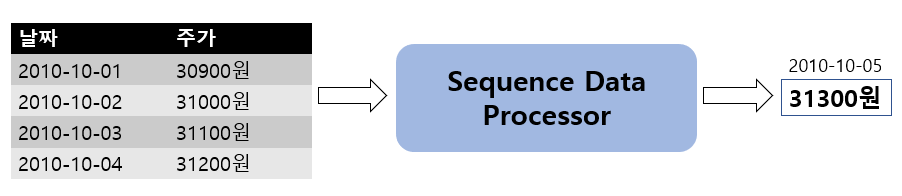
- Input: 4일간 주가
- Output: 5일째 주가

 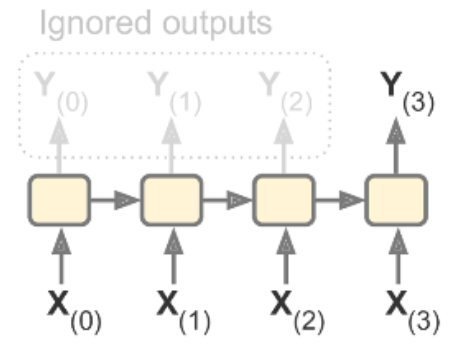

### sequence-to-sequence(many to many)
- Sequnece data가 입력으로 들어가 Sequence Data가 출력된다.
- 예: Machine translation (번역)
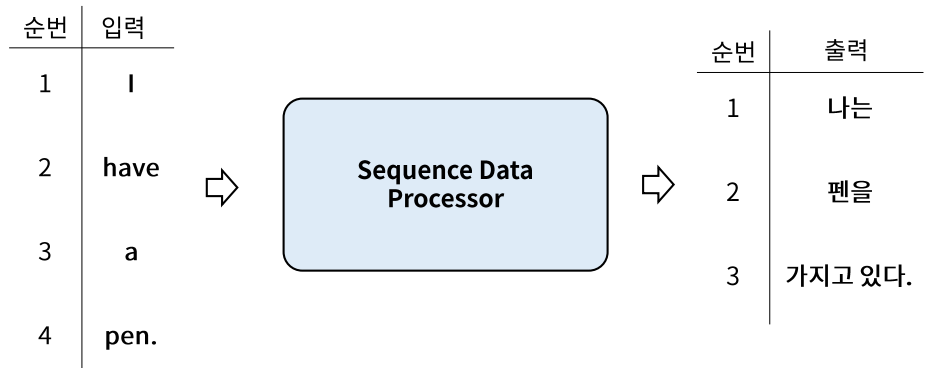    

- Input: 영어 문장 전체를 단어 단위로 순차적 입력
- Output: 번역된 한글 문장을 단어 단위로 순차적 출력
    

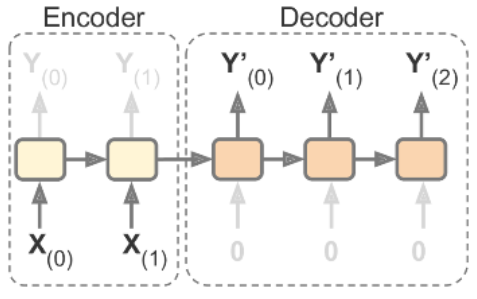

### Vector-to-sequence (one to many)
- 하나의 데이터가 입력으로 들어가 Sequence Data가 출력된다.
- 예: Image captioning (이미지를 설명하는 문장을 만드는 것)
    - 이미지가 입력되면 이미지에 대한 설명이 문장(들)으로 출력된다.
    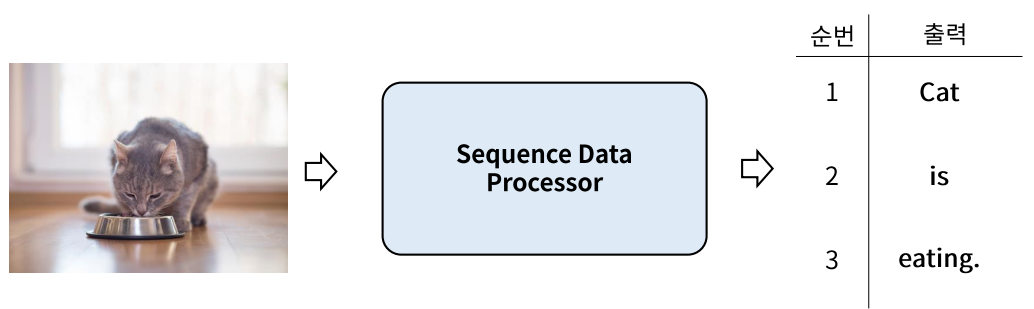

    - Input: 이미지
    - Output: 이미지에 대한 설명을 단어 단위로 순차적으로 출력 
    

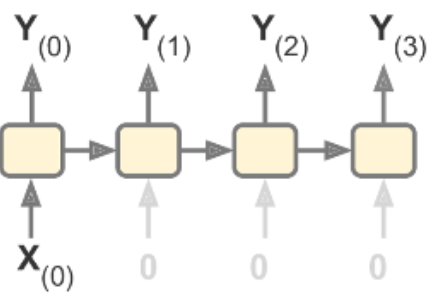

# RNN (Recurrent Neural Networks)

## Recurrent Layer 구조
- Sequential 데이터는 순서에 맞게 처리하는 것이 중요하다. 그러나 DNN, CNN은 순서를 고려하지 않고 특성 추출과 추론을 한다.
- RNN은 순서대 입력되는 데이터를 반복 처리하는  **Recurrent Layer**를 이용해 **Feature vector를 추출하고** 그 Feature vector를 Estimator Layer에 전달해 추론한다.

### 메모리 시스템(Memory system)
- Sequential Data를 처리하는데 중요한 것은 이전 feature를 **기억(memory) 하는 것** 이다.
    - 단순히 순서대로 처리하는 것 뿐만 아니라 **이전 단계의 처리결과를 기억하고 그것을 현재 단계 처리에 사용한다.**

## Memory System (기억시스템)

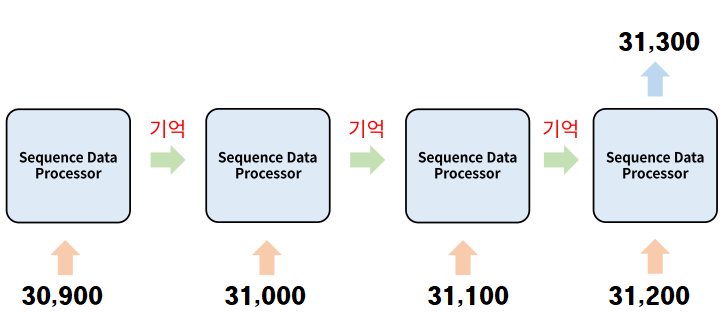

- 예를 들어 4일간의 주가 변화로 5일째 주가를 예측하려면 입력받은 4일간의 주가 정보를 순서대로 기억하고 있어야 한다.
- Fully Connected Layer나 Convolution Layer의 출력은 이전 Data에 대한 처리와 상관없이 현재 데이터를 기준으로만 특성을 추출한다.

## Simple RNN

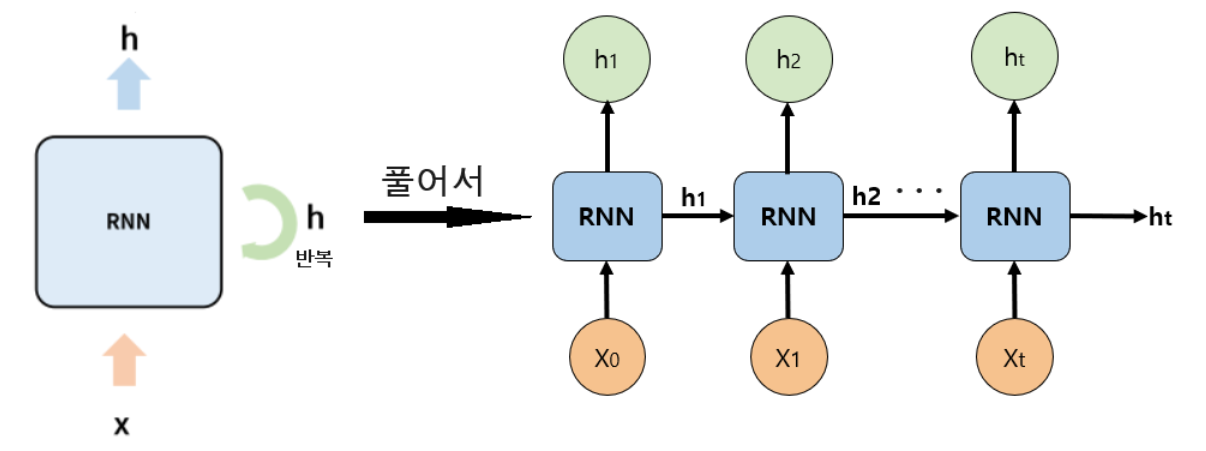

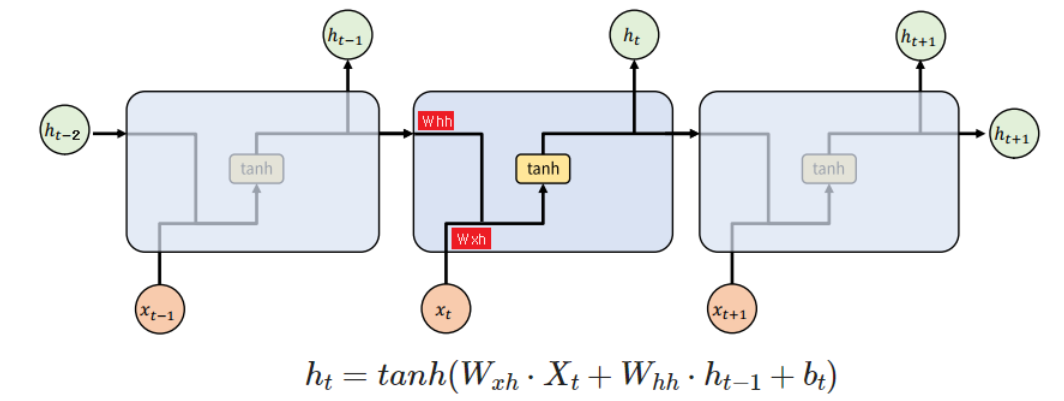

- Recurrent Layer의 Layer는 Linear layer 구조에 재귀 순환(반복)의 개념이 들어간 것으로 이해할 수 있다.
- Layer의 한 step은 입력으로 현재 시점(time step)의 입력 데이터($X_{t}$)와 이전 시점의 처리결과($h_{t-1}$)를 같이 받는다.  (t: time step)
- $X_{t}$와 $h_{t-1}$ 에 각각의 weight($W_{xh}\,, W_{hh}$)를 곱해서 가중합을 구하고 그 둘의 합계를 activation(tanh) 함수에 넣어 처리한 결과가 그 단계의 출력값이된다.
    - $X_{t}$와 $h_{t-1}$ 는 각각 다른  weight($W_{xh}$, $W_{hh}$) 를 내적한다.
- 이전 단계의  출력값은 다시 다음 step의 hidden state로 전달된다.
- **hidden state**
    - 이전 step의 처리결과로 현재 step에 입력되는 값을 말한다.
    - **메모리 시스템의 메모리(기억)** 에 해당한다.
    - 매 타임스텝별로 사용되는 가중치 $W_{xh}$ , $W_{hh}$ 는 동일한 값이다.

### Simple RNN의 문제

- 입력 데이터의 sequence가 길수록 Gradient Vanishing이 발생해 초기 Sequence에 대한 학습이 안되는 문제가 RNN의 고질적인 문제이다.
    - RNN은 activation 함수로 tanh()를 사용한다. tanh()의 gradient는 0 ~ 1 사이의 실수가 나온다. 그래서 sequence가 길어지면 초기 time step의 값에 대한 weight가 업데이트가 되지 않게 된다.  
    - 초기 Sequence에 대해 학습이 안되어서 **기억력 소실문제** 라고 표현 한다. 

- 이런 Simple RNN의 문제 모델 구조로 해결한 모델이 **LSTM이나 GRU** 모델이다. Sequential 데이터 처리 모델로 이 둘을 주로 사용한다.
    - Long Short Term Memory(LSTM; Hochreiter & Schmidhuber, 1997)
    - Gated Recurrent Unit(GRU; Kyunghyun Cho et al., 2014) 

## LSTM (Long Short Term Memory)
- Simple RNN을 개선한 변형 알고리즘
    - 바로 전 time step의 처리리결과와 전체 time step의 처리결과를 같이 받는다.
- 오래 기억할 것은 유지하고 잊어버릴 것은 빨리 잊어버리자

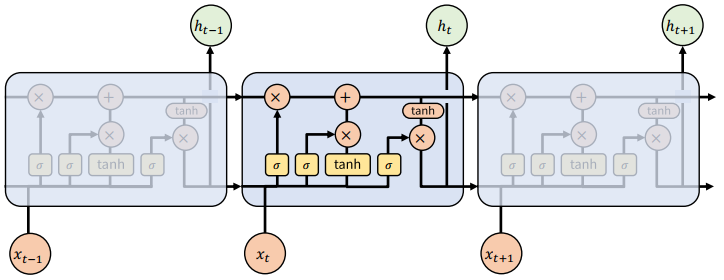

### LSTM 이전 기억

- **Cell State**
    - Long term memory 로 전체 step에 대한 누적 기억값(처리결과)
- **Hidden State**
    - Short term memory 로 이전 sequence 에 대한 기억값(처리결과)

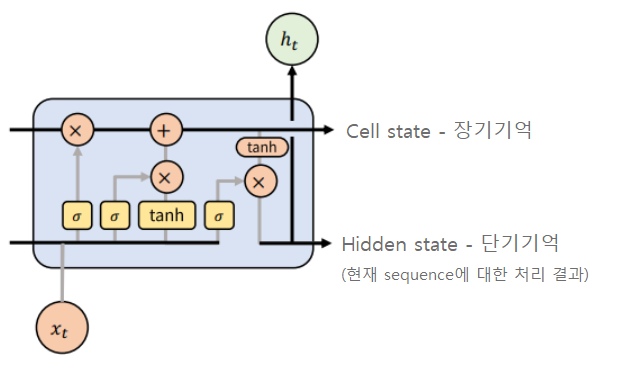

### LSTM의 구조
- Gate
    - sigmoid 를 이용해 값의 얼마를 적용할지 정한다. 이것을 문이 열리고 닫히는 의미로 Gate라고 한다.
- 다음 3개 Gate로 구성
    -  **Forget gate**
        - 입력된 cell state에서 얼마나 잊어 버릴지를 처리.
    -  **Input gate**
        - 현재 sequence의 입력데이터를 cell state에 더한다.
    -  **Output gate**
        - 현재 sequence의 입력데이터를 처리해서 output으로 출력(hidden state)
-  각 Gate는 hidden state와 Input data에 곱하는 Weight들을 가진다.

### Forget gate
- 현재 Sequence의 입력값을 기준으로 Cell state의 값에서 **얼마나 잊을지** 결정

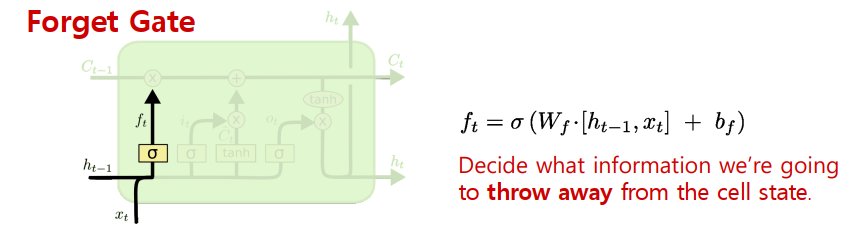

### Input gate
- 현재 Sequence의 입력값을 Cell state에 추가
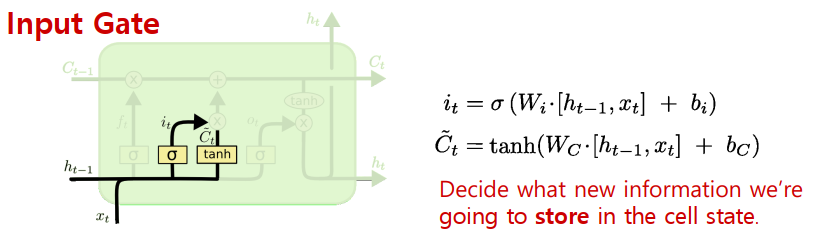

### Cell State 업데이트
- **Forget gate에서** 현재 sequence의 데이터가 추론에 얼마나 중요한지 만큼 이전 step까지의 cell state값을 줄인다. 그리고 **input gate에서** 현재 sequence의 값을 cell state에 추가한다.
    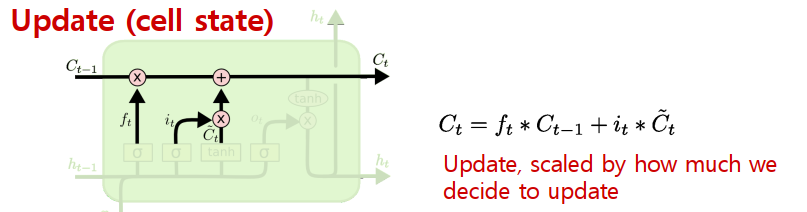

### Output gate
- LSTM에서 output gate의 처리결과는 hidden state로 다음 sequence 처리 step으로 전달된다.
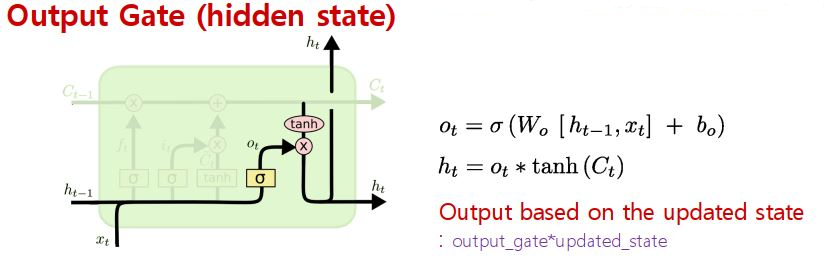